# Assets Algorithmic Trading Backtesting with Backtrader

## 1. Downloading the data:

In [119]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Date range
start = '2010-01-01'
end = '2024-12-31'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA','SPY']
assets.sort()

# Downloading data
prices = yf.download(assets, start=start, end=end)
display(prices.head())
prices = prices.dropna()

[*********************100%%**********************]  26 of 26 completed


Price       Adj Close                                                       \
Ticker            APA         BA        BAX        BMY     CMCSA       CNP   
Date                                                                         
2010-01-04 8297.9156% 4377.7557% 2384.6443% 1578.1898% 629.7534% 833.1619%   
2010-01-05 8395.8900% 4521.1342% 2368.2800% 1553.5583% 621.2179% 826.8508%   
2010-01-06 8527.5665% 4658.2802% 2376.4622% 1552.9427% 616.7649% 818.8169%   
2010-01-07 8398.2407% 4846.8548% 2414.9178% 1554.1736% 629.7534% 826.8508%   
2010-01-08 8354.3488% 4800.1019% 2420.6446% 1528.3128% 627.8977% 817.0956%   

Price                                                   ...   Volume           \
Ticker            CPB         DE        HPQ        JCI  ...     PCAR      PSA   
Date                                                    ...                     
2010-01-04 2175.9565% 4214.9292% 1613.6395% 1207.8208%  ...  3947550  1579100   
2010-01-05 2179.8113% 4199.1390% 1620.4073% 1201.8262%  ...  3448950  1131000   
2010-01-06 2155.3978% 4187.8635% 1605.3326% 1197.8300%  ...  5347500   832400   
2010-01-07 2122.6339% 4217.9359% 1605.9481% 1206.4882%  ...  3683550  1284100   
2010-01-08 2109.1429% 4332.9720% 1617.9461% 1210.4842%  ...  3606450  1281100   

Price                                                                  \
Ticker          SEE        SPY         T       TGT      TMO       TXT   
Date                                                                    
2010-01-04   920400  118944600  38576858   4589100  7182800   3630600   
2010-01-05   831400  111579900  46650478   4760100  3221900  12121100   
2010-01-06  1334400  116074400  50172450   7217400  3065000   5598300   
2010-01-07  1394900  131091100  44486797  12531000  2638300   5196100   
2010-01-08   702900  126402800  36586622   6512800  3162200   4104000   

Price                           
Ticker            VZ      ZION  
Date                            
2010-01-04  16176648   3974600  
2010-01-05  23722957   5605500  
2010-01-06  37506464  12615200  
2010-01-07  25508242  24716800  
2010-01-08  20658308   6903000  

[5 rows x 156 columns]

In [120]:
############################################################
# Showing data
############################################################

display(prices.head())

Price       Adj Close                                                       \
Ticker            APA         BA        BAX        BMY     CMCSA       CNP   
Date                                                                         
2010-01-04 8297.9156% 4377.7557% 2384.6443% 1578.1898% 629.7534% 833.1619%   
2010-01-05 8395.8900% 4521.1342% 2368.2800% 1553.5583% 621.2179% 826.8508%   
2010-01-06 8527.5665% 4658.2802% 2376.4622% 1552.9427% 616.7649% 818.8169%   
2010-01-07 8398.2407% 4846.8548% 2414.9178% 1554.1736% 629.7534% 826.8508%   
2010-01-08 8354.3488% 4800.1019% 2420.6446% 1528.3128% 627.8977% 817.0956%   

Price                                                   ...   Volume           \
Ticker            CPB         DE        HPQ        JCI  ...     PCAR      PSA   
Date                                                    ...                     
2010-01-04 2175.9565% 4214.9292% 1613.6395% 1207.8208%  ...  3947550  1579100   
2010-01-05 2179.8113% 4199.1390% 1620.4073% 1201.8262%  ...  3448950  1131000   
2010-01-06 2155.3978% 4187.8635% 1605.3326% 1197.8300%  ...  5347500   832400   
2010-01-07 2122.6339% 4217.9359% 1605.9481% 1206.4882%  ...  3683550  1284100   
2010-01-08 2109.1429% 4332.9720% 1617.9461% 1210.4842%  ...  3606450  1281100   

Price                                                                  \
Ticker          SEE        SPY         T       TGT      TMO       TXT   
Date                                                                    
2010-01-04   920400  118944600  38576858   4589100  7182800   3630600   
2010-01-05   831400  111579900  46650478   4760100  3221900  12121100   
2010-01-06  1334400  116074400  50172450   7217400  3065000   5598300   
2010-01-07  1394900  131091100  44486797  12531000  2638300   5196100   
2010-01-08   702900  126402800  36586622   6512800  3162200   4104000   

Price                           
Ticker            VZ      ZION  
Date                            
2010-01-04  16176648   3974600  
2010-01-05  23722957   5605500  
2010-01-06  37506464  12615200  
2010-01-07  25508242  24716800  
2010-01-08  20658308   6903000  

[5 rows x 156 columns]

## 2. Building the Backtest Function with Backtrader

### 2.1 Defining Backtest Function

In [121]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.005) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        cerebro.plot(iplot=False, start=start, end=end)
    return (results[0].analyzers.drawdown.get_analysis()['max']['drawdown'],
            results[0].analyzers.returns.get_analysis()['rnorm100'],
            results[0].analyzers.sharperatio.get_analysis()['sharperatio'])

### 2.2 Building Data Feeds for Backtesting

In [122]:
############################################################
# Create objects that contain the prices of assets
############################################################

# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != 'SPY':
        prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))

# Creating Benchmark bt.feeds        
prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), 'SPY')].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,11333.0002%,11338.9999%,11151.0002%,11237.0003%,118944600
2010-01-05,11362.9997%,11368.0000%,11284.9998%,11326.0002%,111579900
2010-01-06,11370.9999%,11398.9998%,11343.0000%,11351.9997%,116074400
2010-01-07,11419.0002%,11433.0002%,11318.0000%,11350.0000%,131091100
2010-01-08,11457.0000%,11462.0003%,11366.0004%,11388.9999%,126402800


## 3. Building Strategies with Backtrader

### 3.1 Buy and Hold SPY

In [123]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= 1004:
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

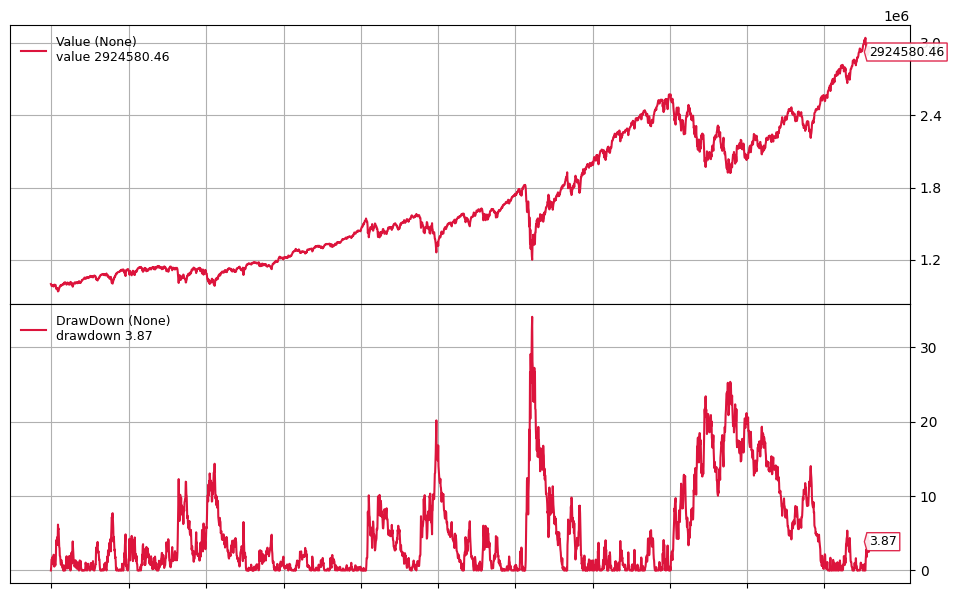

In [124]:
############################################################
# Run the backtest for the selected period
############################################################
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
# plt.plot() # We need to do this to avoid errors in inline plot

start = 1004
end = prices.shape[0] - 1

dd, cagr, sharpe = backtest([benchmark],
                            BuyAndHold,
                            start=start,
                            end=end,
                            plot=True)

In [125]:
############################################################
# Show Buy and Hold Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 34.10%
CAGR: 7.51%
Sharpe: 0.617


### 3.2 Rebalancing Quarterly using Riskfolio-Lib

In [126]:
############################################################
# Calculate assets returns
############################################################

pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=['SPY']).dropna()
returns = data.pct_change().dropna()
display(returns.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,1.1807%,3.2752%,-0.6862%,-1.5607%,-1.3554%,-0.7575%,0.1772%,-0.3746%,0.4194%,-0.4963%,...,-0.2579%,1.8028%,0.8237%,-1.0445%,-0.4898%,0.3707%,0.3369%,-1.8907%,0.1803%,3.5258%
2010-01-06,1.5683%,3.0334%,0.3455%,-0.0396%,-0.7168%,-0.9716%,-1.1200%,-0.2685%,-0.9303%,-0.3325%,...,-1.1636%,1.3147%,-0.6065%,-1.9275%,-0.9824%,1.9084%,0.9442%,3.4796%,-2.8754%,8.6957%
2010-01-07,-1.5166%,4.0482%,1.6182%,0.0793%,2.1059%,0.9812%,-1.5201%,0.7181%,0.0383%,0.7228%,...,-1.2427%,1.3242%,-0.1370%,1.0295%,-1.1228%,1.2284%,0.0000%,4.4490%,-0.5952%,11.2001%
2010-01-08,-0.5226%,-0.9646%,0.2371%,-1.6640%,-0.2947%,-1.1798%,-0.6356%,2.7273%,0.7471%,0.3312%,...,-0.5298%,0.1307%,-1.8206%,0.4168%,-0.7326%,-0.3978%,1.6836%,0.9410%,0.0630%,-1.6187%
2010-01-11,0.3002%,-1.1851%,-0.5746%,1.0475%,-0.6501%,0.7023%,0.3046%,4.0257%,-0.3042%,2.5860%,...,1.2649%,1.6445%,0.6859%,-0.0461%,-0.4797%,0.2197%,1.1856%,5.3484%,0.4095%,0.6094%


In [127]:
############################################################
# Selecting Dates for Rebalancing
############################################################

# Selecting last day of month of available data
index = returns.groupby([returns.index.year, returns.index.month]).tail(1).index
index_2 = returns.index

# Quarterly Dates
index = [x for x in index if float(x.month) % 3.0 == 0 ] 

# Dates where the strategy will be backtested
index_ = [index_2.get_loc(x) for x in index if index_2.get_loc(x) > 1000]

In [128]:
############################################################
# Building Constraints
############################################################

asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False],
               'Type': ['All Assets', 'All Classes', 'All Classes'],
               'Set': ['', 'Industry', 'Industry'],
               'Position': ['', '', ''],
               'Sign': ['<=', '<=', '>='],
               'Weight': [0.10, 0.20, 0.03],
               'Type Relative': ['', '', ''],
               'Relative Set': ['', '', ''],
               'Relative': ['', '', ''],
               'Factor': ['', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,All Classes,Industry,,<=,20.0000%,,,,
2,False,All Classes,Industry,,>=,3.0000%,,,,


In [129]:
############################################################
# Building constraint matrixes for Riskfolio Lib
############################################################

import riskfolio as rp

A, B = rp.assets_constraints(constraints, asset_classes)

In [130]:
%%time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

models = {}

# rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
#        'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

# rms = ['MV', 'CVaR', 'WR', 'CDaR']

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

for j in rms:
    
    weights = pd.DataFrame([])

    for i in index_:
        Y = returns.iloc[i-1000:i,:] # taking last 4 years (250 trading days per year)

        # Building the portfolio object
        port = rp.Portfolio(returns=Y)
        
        # Add portfolio constraints
        # port.ainequality = A
        # port.binequality = B
        
        # Calculating optimum portfolio

        # Select method and estimate input parameters:

        method_mu='hist' # Method to estimate expected returns based on historical data.
        method_cov='hist' # Method to estimate covariance matrix based on historical data.

        port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
        
        # Estimate optimal portfolio:
        
        port.solvers = ['MOSEK']
        port.alpha = 0.05
        model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
        rm = j # Risk measure used, this time will be variance
        obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
        hist = True # Use historical scenarios for risk measures that depend on scenarios
        rf = 0 # Risk free rate
        l = 0 # Risk aversion factor, only useful when obj is 'Utility'

        w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

        if w is None:
            w = weights.tail(1).T
        weights = pd.concat([weights, w.T], axis = 0)
    
    models[j] = weights.copy()
    models[j].index = index_

CPU times: user 3min 27s, sys: 14.9 s, total: 3min 42s
Wall time: 29.8 s


In [131]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):

        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            j += 1
        
        self.counter = 0
        
    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

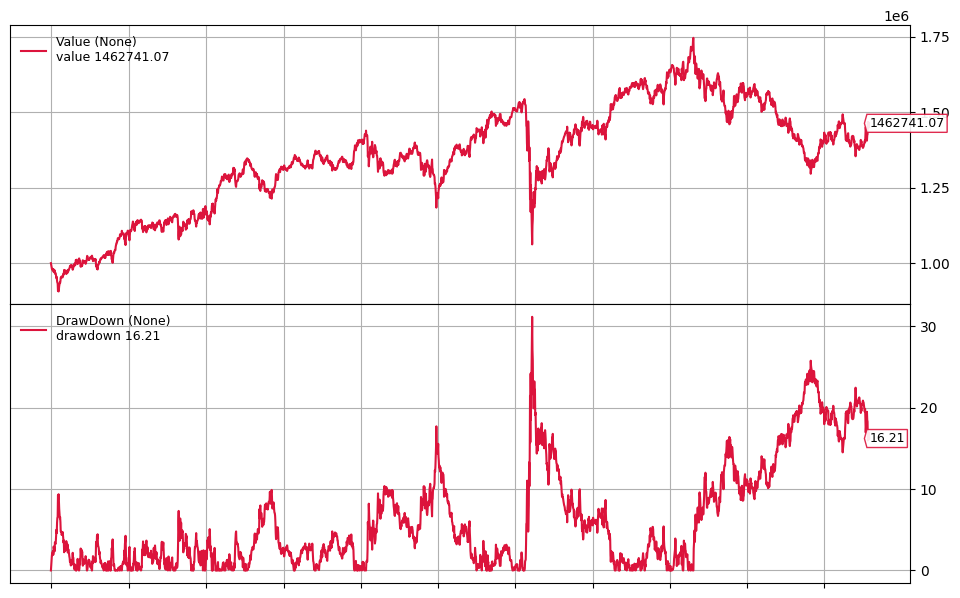

In [132]:
############################################################
# Backtesting Mean Variance Strategy
############################################################

assets = returns.columns.tolist()
weights = models['MV']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [95]:
############################################################
# Show Mean Variance Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 31.27%
CAGR: 3.52%
Sharpe: 0.350


array([<Axes: ylabel='3644'>], dtype=object)

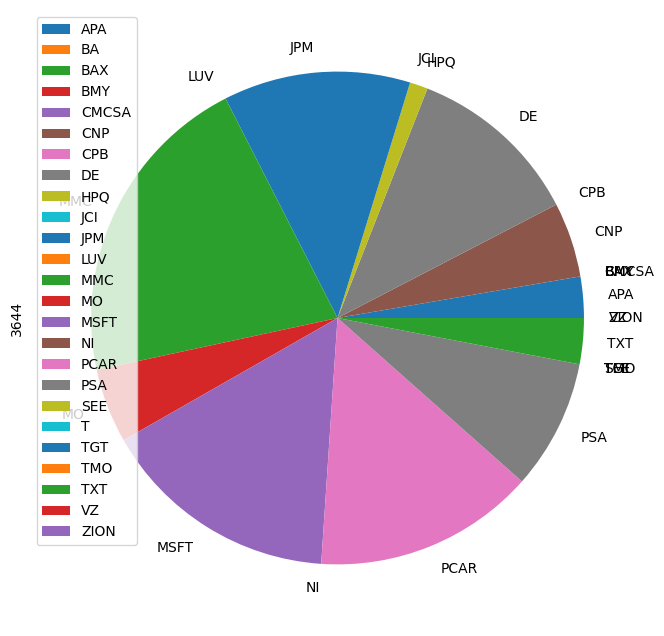

In [96]:
############################################################
# Plotting the composition of the last MV portfolio
############################################################

w = pd.DataFrame(models['MV'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [98]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Consumer Discretionary,0.0000%
Consumer Staples,4.8724%
Energy,2.7027%
Financials,41.6725%
Health Care,0.0000%
Health care,0.0000%
Industrials,28.9728%
Information Technology,16.8677%
Materials,0.0000%


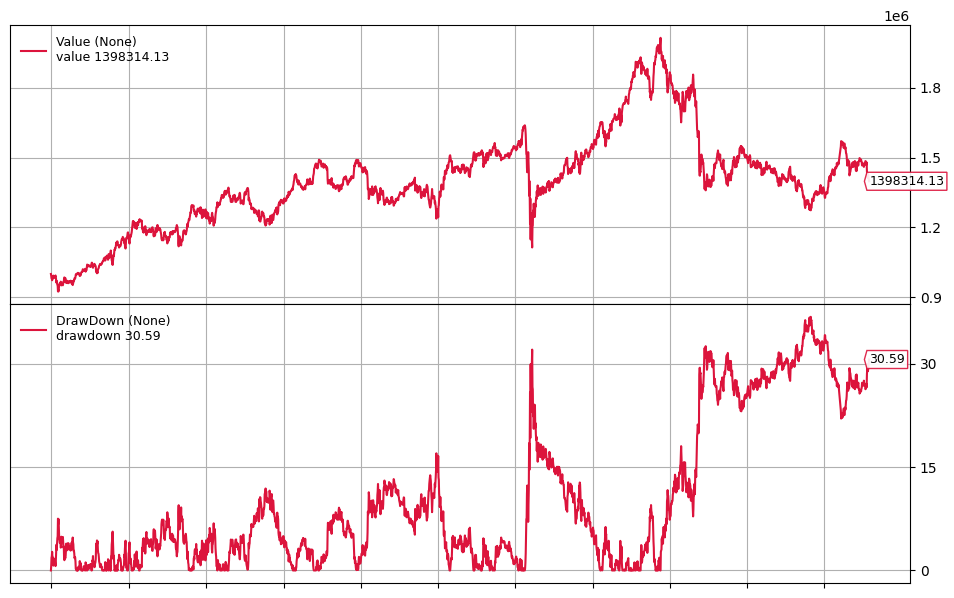

In [99]:
############################################################
# Backtesting Mean CVaR Strategy
############################################################

assets = returns.columns.tolist()
weights = models['CVaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [100]:
############################################################
# Show CVaR Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 36.78%
CAGR: 2.21%
Sharpe: 0.248


array([<Axes: ylabel='3644'>], dtype=object)

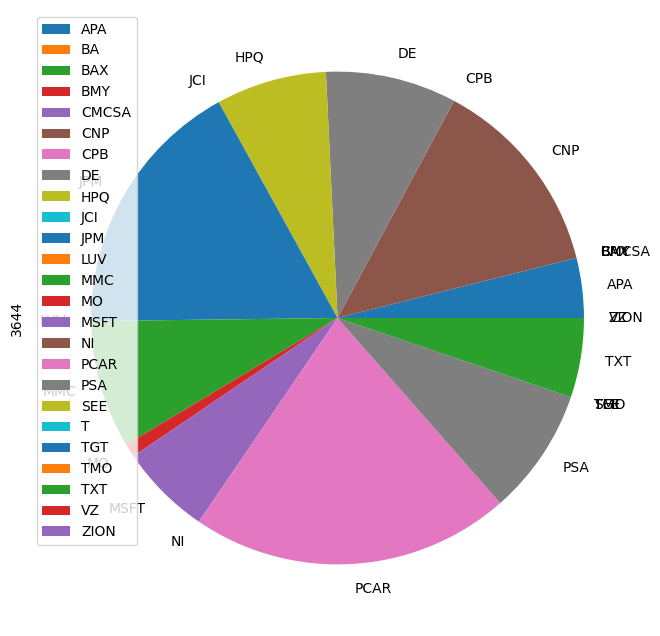

In [101]:
############################################################
# Plotting the composition of the last CVaR portfolio
############################################################

w = pd.DataFrame(models['CVaR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [102]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Consumer Discretionary,0.0000%
Consumer Staples,0.8711%
Energy,3.9223%
Financials,33.9092%
Health Care,0.0000%
Health care,0.0000%
Industrials,34.7723%
Information Technology,13.2799%
Materials,0.0000%


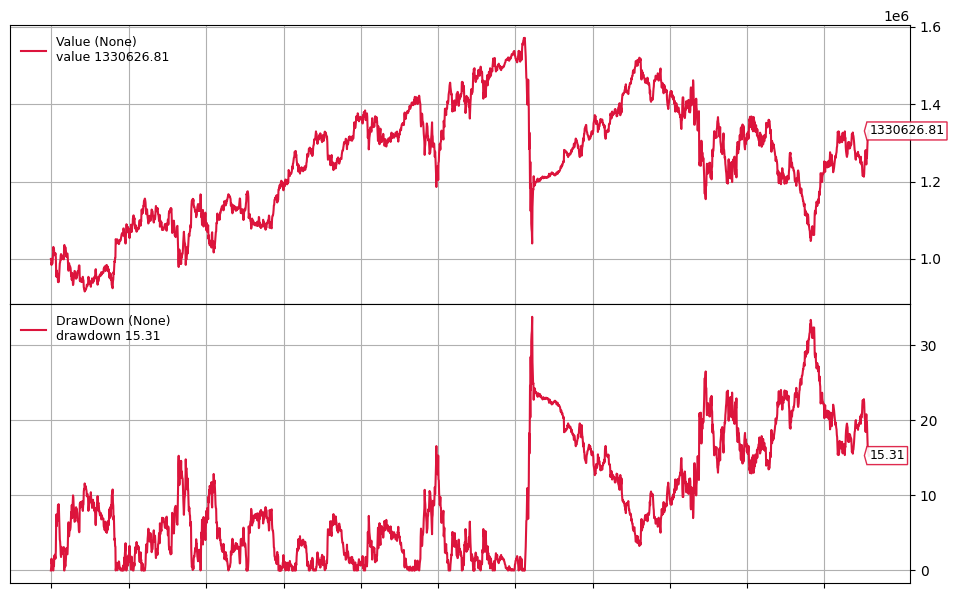

In [103]:
############################################################
# Backtesting Mean Worst Realization Strategy
############################################################

assets = returns.columns.tolist()
weights = models['WR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [71]:
############################################################
# Show Worst Realization Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 28.70%
CAGR: 6.92%
Sharpe: 0.649


array([<Axes: ylabel='3644'>], dtype=object)

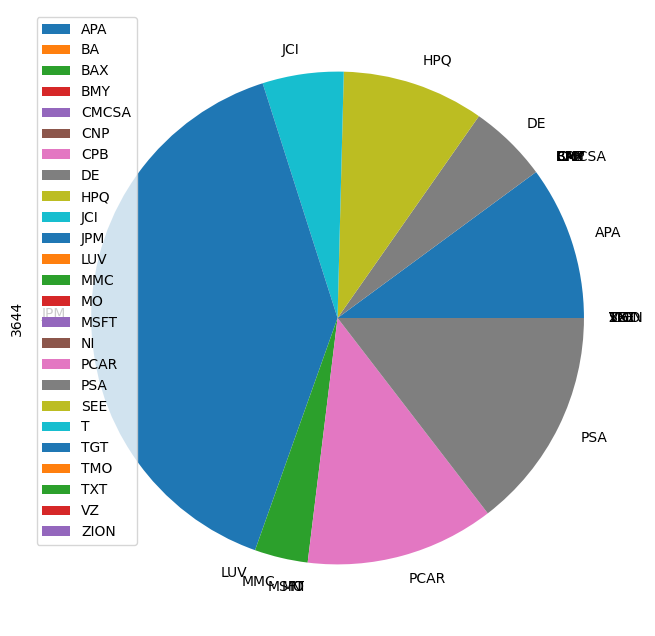

In [104]:
############################################################
# Plotting the composition of the last WR portfolio
############################################################

w = pd.DataFrame(models['WR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean WR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [105]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Consumer Discretionary,5.3206%
Consumer Staples,0.0000%
Energy,10.0922%
Financials,57.7115%
Health Care,0.0000%
Health care,0.0000%
Industrials,17.5550%
Information Technology,9.3207%
Materials,0.0000%


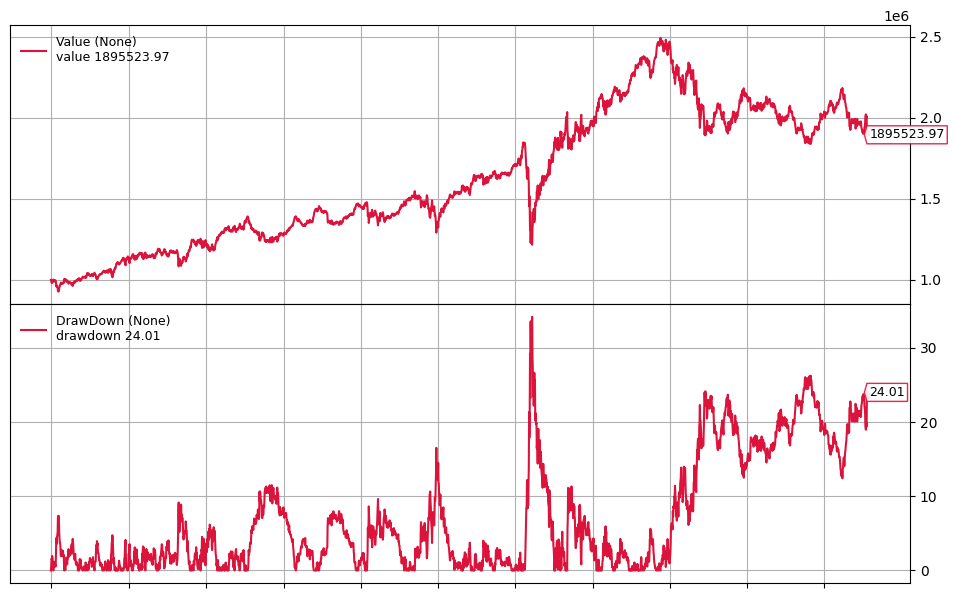

In [106]:
############################################################
# Backtesting Mean CDaR Strategy
############################################################

assets = returns.columns.tolist()
weights = models['CDaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [107]:
############################################################
# Show CDaR Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 34.20%
CAGR: 4.37%
Sharpe: 0.428


array([<Axes: ylabel='3644'>], dtype=object)

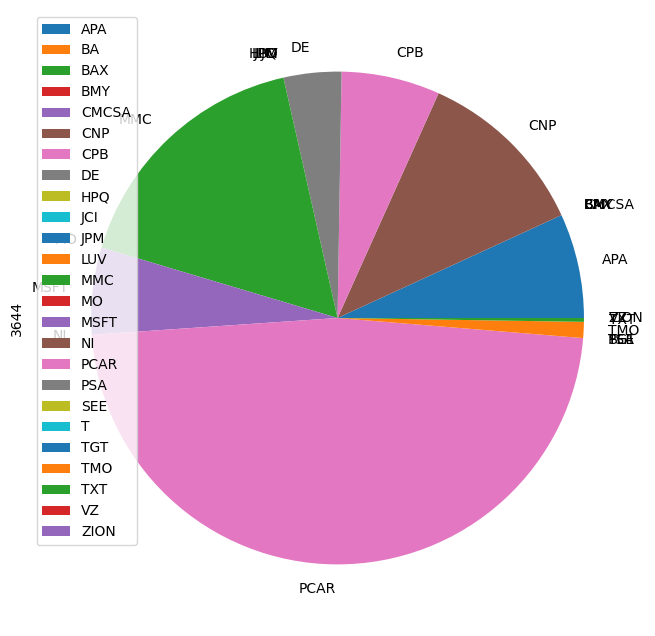

In [108]:
############################################################
# Plotting the composition of the last CDaR portfolio
############################################################

w = pd.DataFrame(models['CDaR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean CDaR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [109]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Consumer Discretionary,0.0000%
Consumer Staples,6.4625%
Energy,6.8553%
Financials,16.8560%
Health Care,0.0000%
Health care,1.0493%
Industrials,51.6542%
Information Technology,5.7012%
Materials,0.0000%


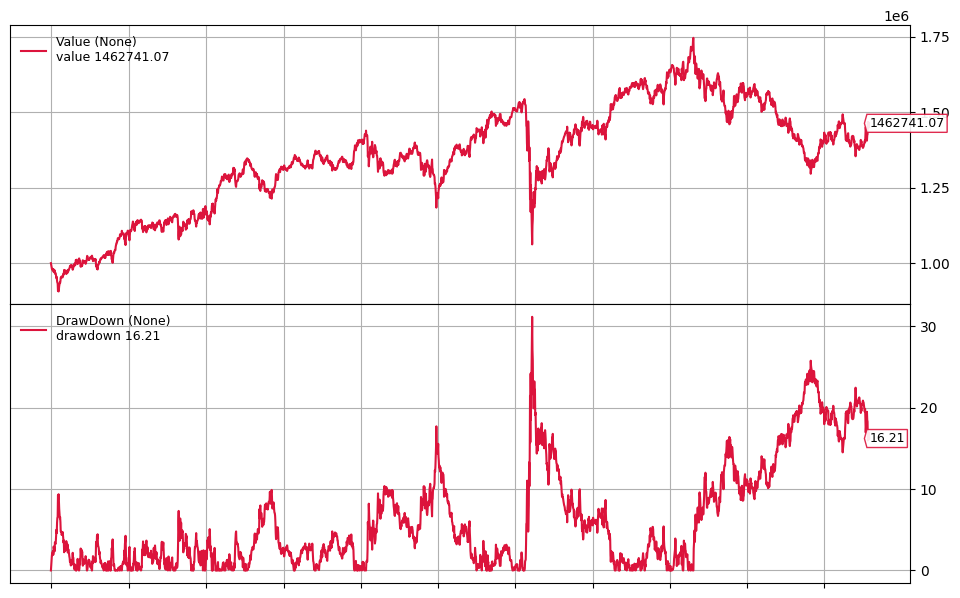

Max Drawdown: 31.16%
CAGR: 2.69%
Sharpe: 0.336


In [133]:
assets = returns.columns.tolist()
weights = models['MV']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

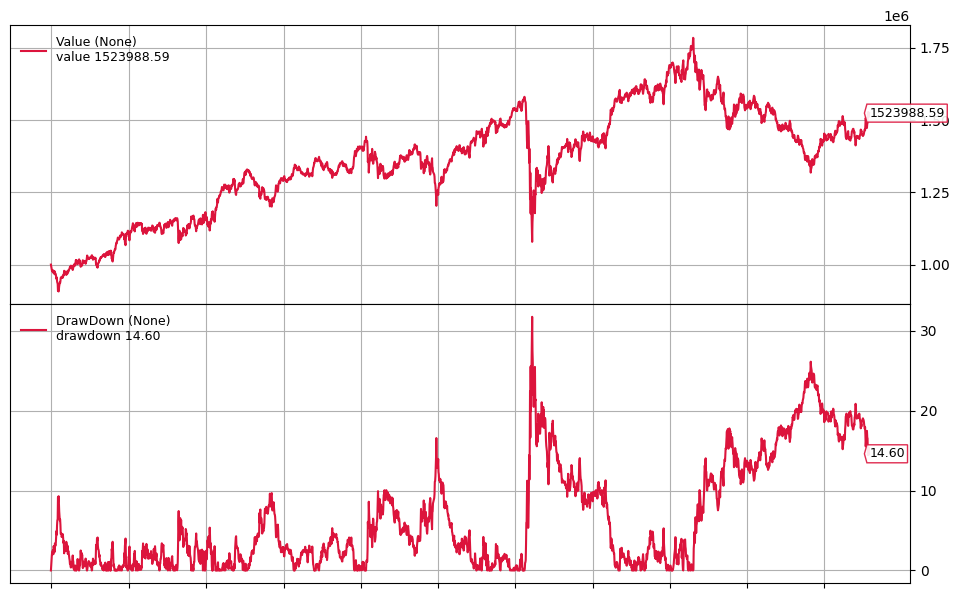

Max Drawdown: 31.75%
CAGR: 2.97%
Sharpe: 0.354


In [134]:
assets = returns.columns.tolist()
weights = models['MAD']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

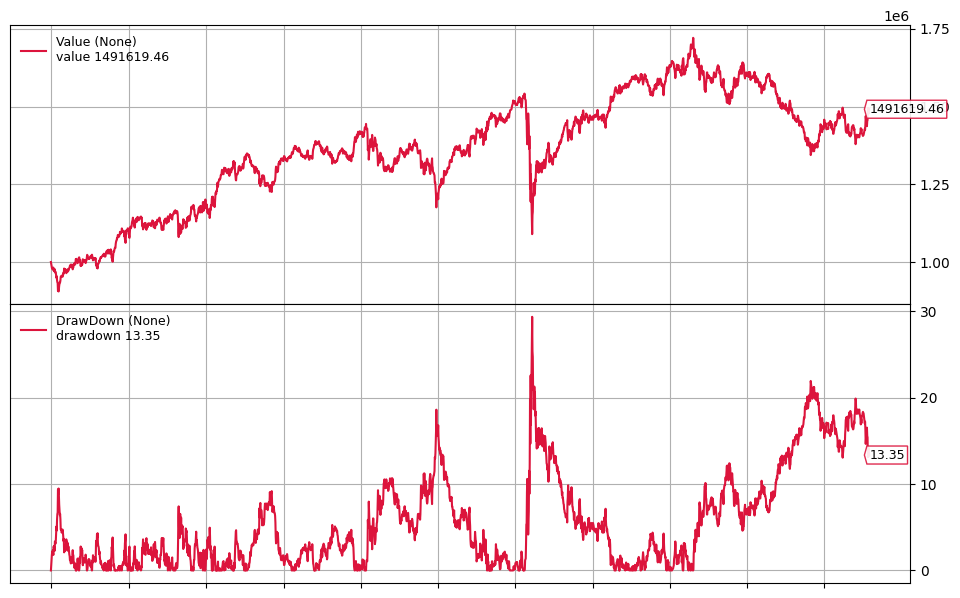

Max Drawdown: 29.34%
CAGR: 2.83%
Sharpe: 0.343


In [135]:
assets = returns.columns.tolist()
weights = models['MSV']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

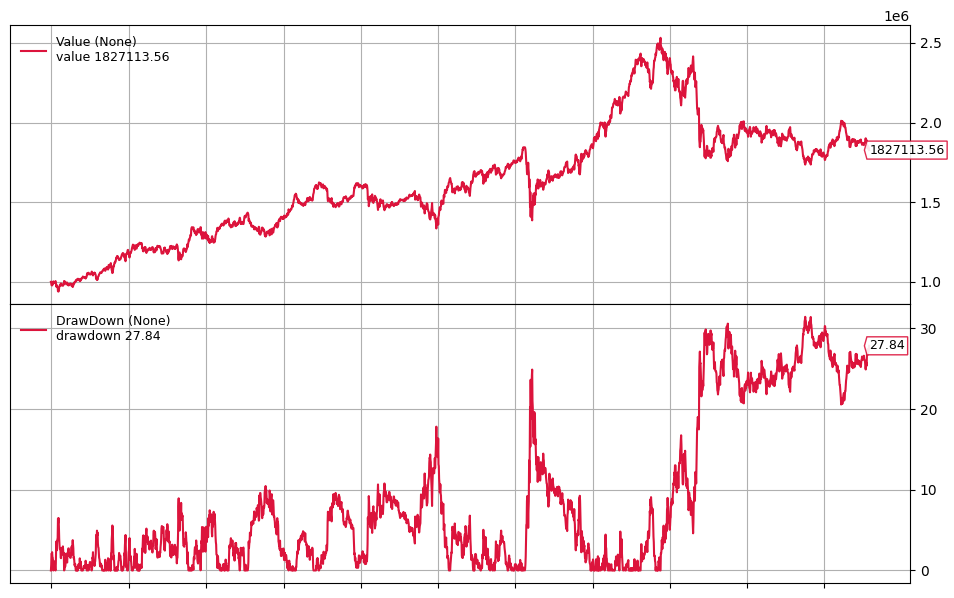

Max Drawdown: 31.44%
CAGR: 4.11%
Sharpe: 0.373


In [113]:
assets = returns.columns.tolist()
weights = models['FLPM']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

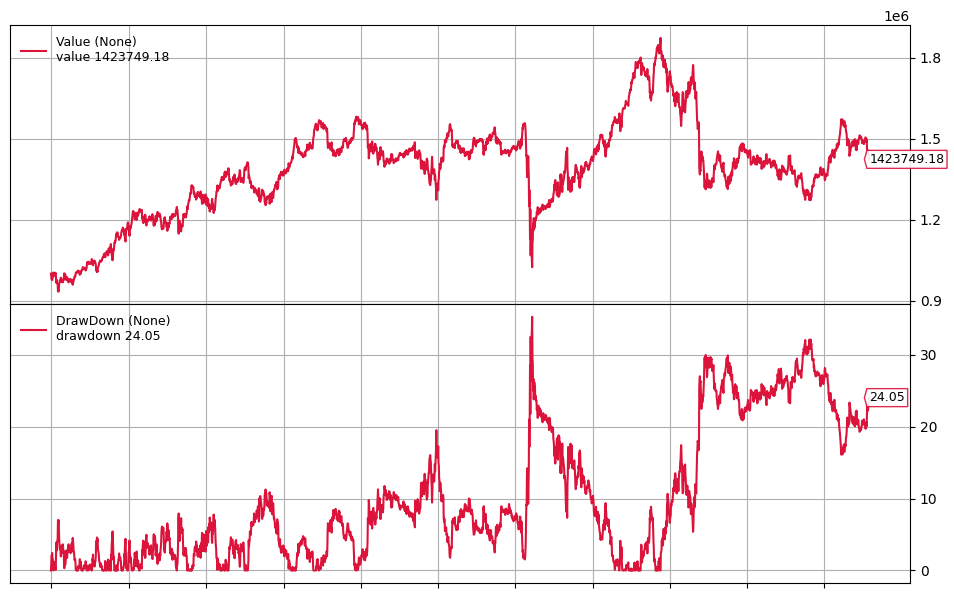

Max Drawdown: 35.30%
CAGR: 2.35%
Sharpe: 0.270


In [114]:
assets = returns.columns.tolist()
weights = models['SLPM']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

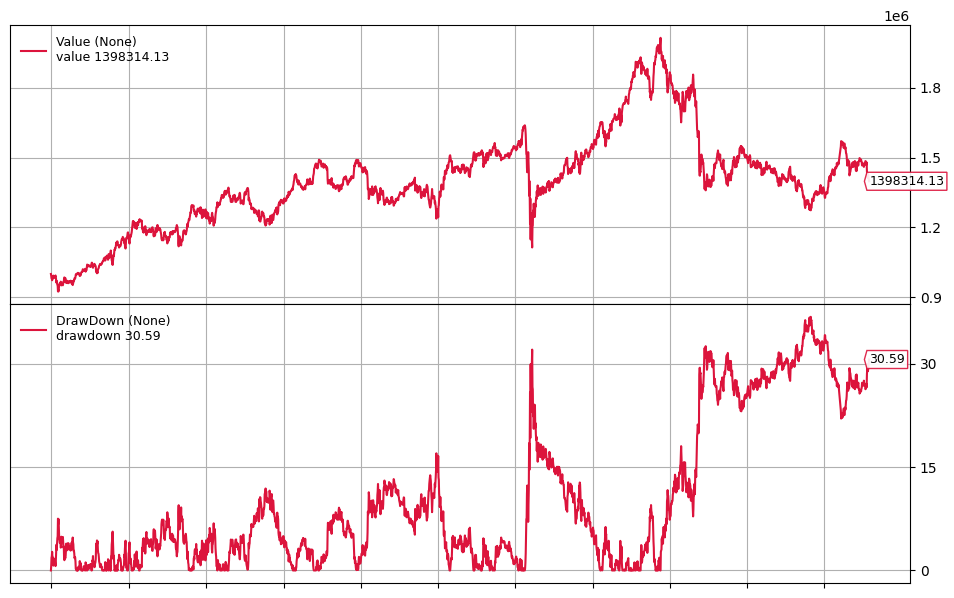

Max Drawdown: 36.78%
CAGR: 2.21%
Sharpe: 0.248


In [115]:
assets = returns.columns.tolist()
weights = models['CVaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

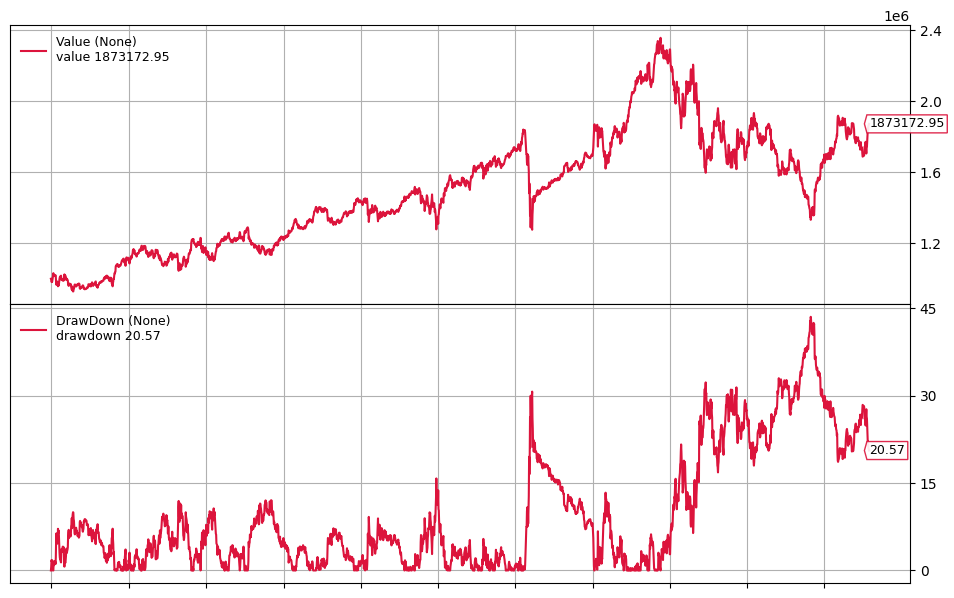

Max Drawdown: 43.51%
CAGR: 4.24%
Sharpe: 0.363


In [116]:
assets = returns.columns.tolist()
weights = models['EVaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

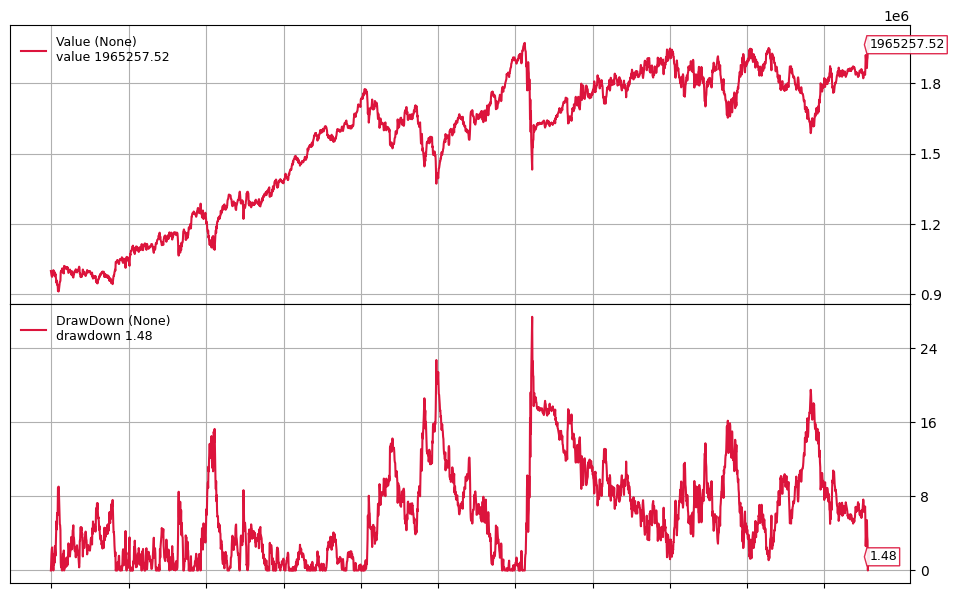

Max Drawdown: 27.40%
CAGR: 4.77%
Sharpe: 0.423


In [141]:
assets = returns.columns.tolist()
weights = models['WR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

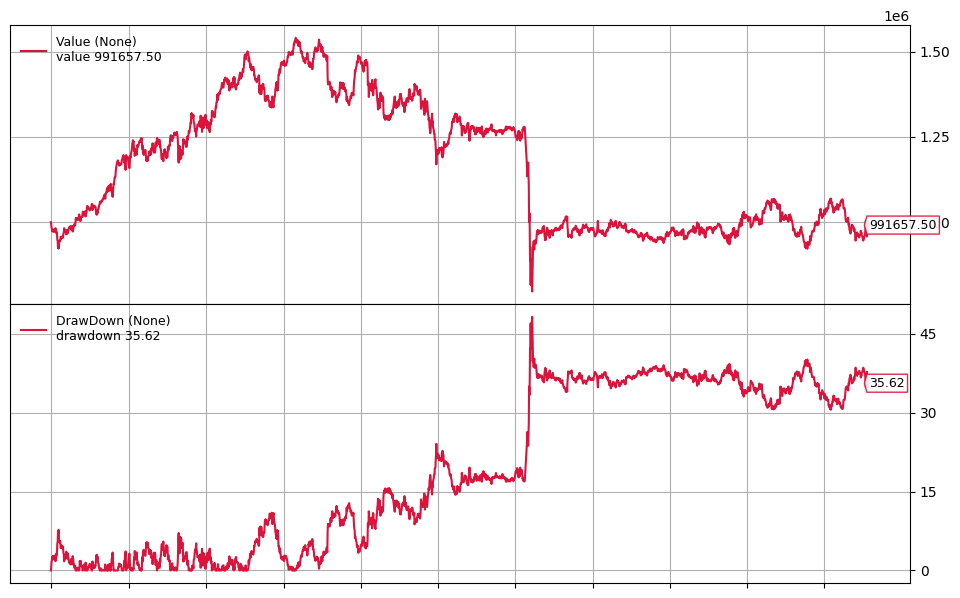

Max Drawdown: 48.25%
CAGR: -0.05%
Sharpe: 0.047


In [140]:
assets = returns.columns.tolist()
weights = models['MDD']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

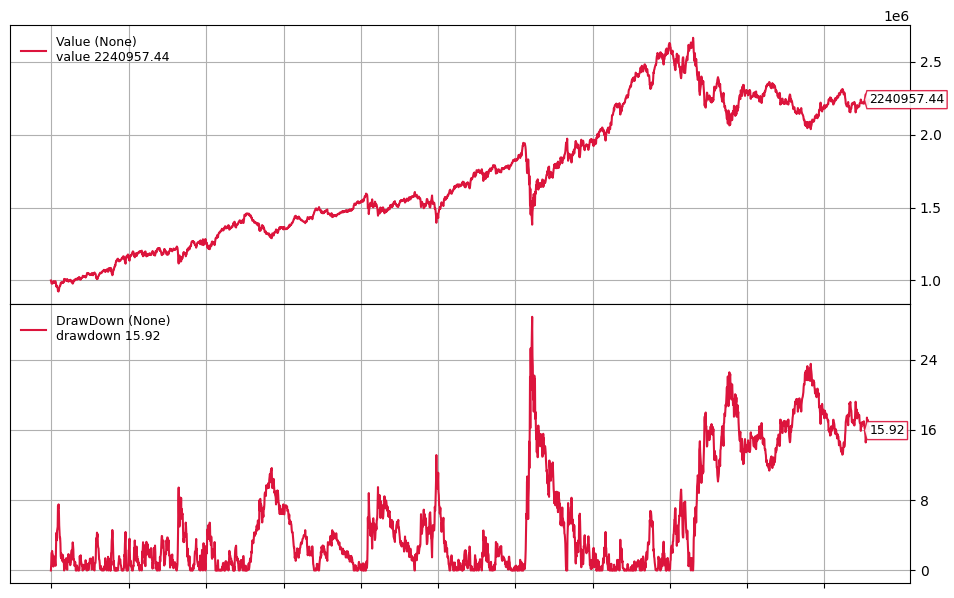

Max Drawdown: 28.87%
CAGR: 5.64%
Sharpe: 0.520


In [139]:
assets = returns.columns.tolist()
weights = models['ADD']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

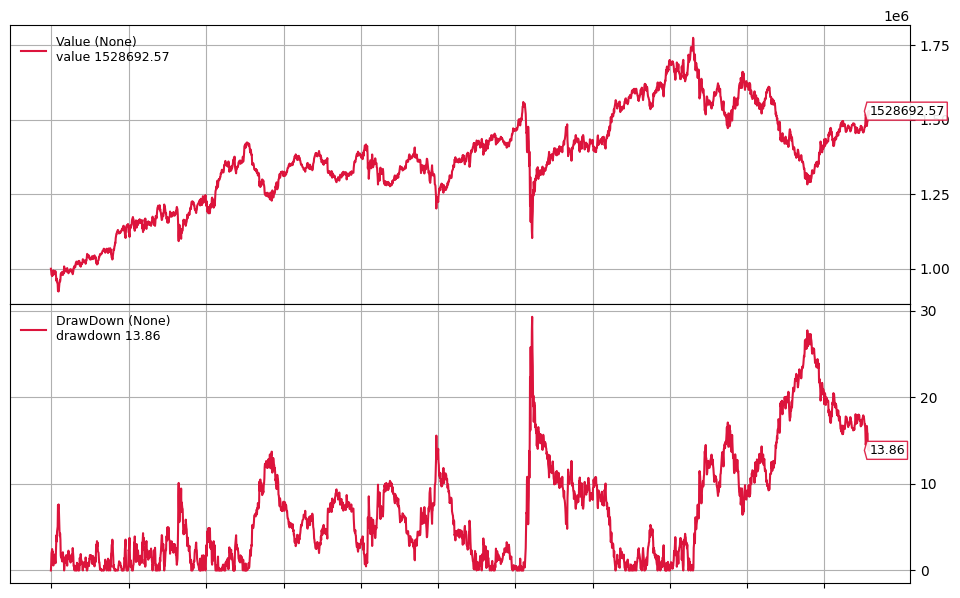

Max Drawdown: 29.27%
CAGR: 2.96%
Sharpe: 0.359


In [138]:
assets = returns.columns.tolist()
weights = models['CDaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

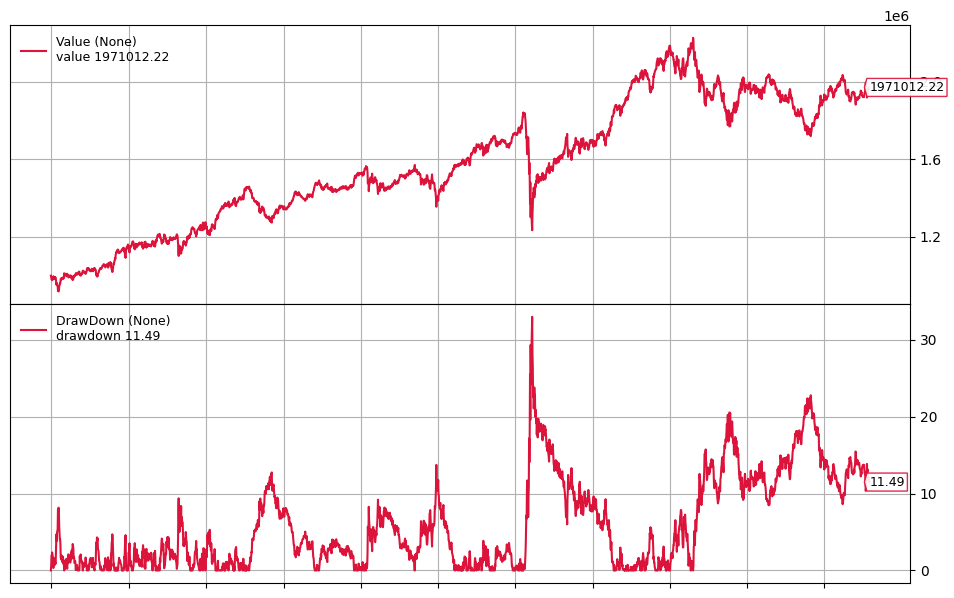

Max Drawdown: 32.98%
CAGR: 4.75%
Sharpe: 0.484


In [137]:
assets = returns.columns.tolist()
weights = models['UCI']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

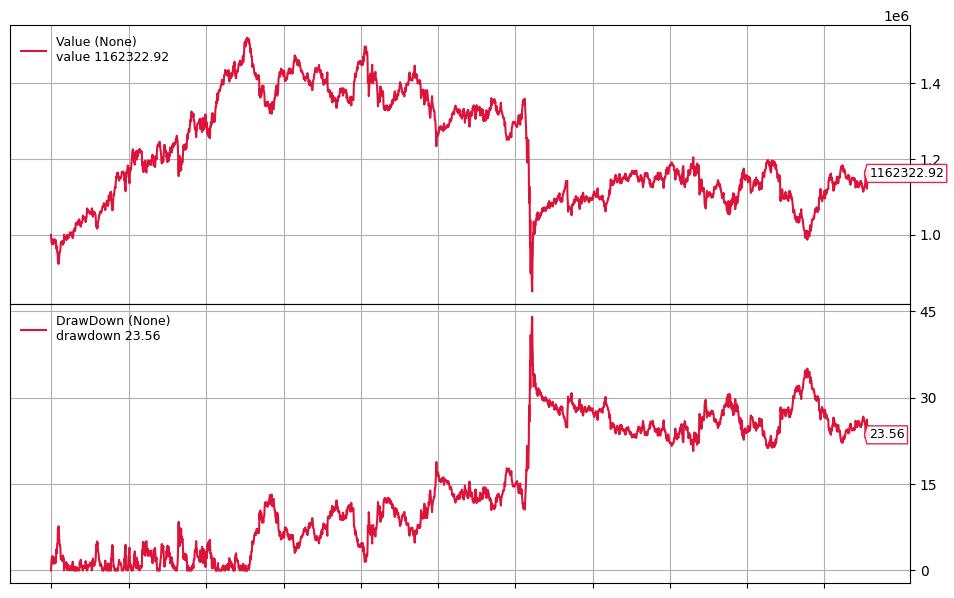

Max Drawdown: 44.06%
CAGR: 1.03%
Sharpe: 0.163


In [136]:
assets = returns.columns.tolist()
weights = models['EDaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)
print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")